In [1]:
# Code for pretty-printing math notation
from IPython.display import display, Math, Latex, Markdown

def display_math(str_latex):
    display(Markdown('${}$'.format(str_latex)))
    
# Demo:
display_math(r'x \in \mathcal{S} \implies y \in \mathcal{T}')

$x \in \mathcal{S} \implies y \in \mathcal{T}$

In [19]:
import re

In [31]:
# Test cell 2: test against random equations (2 points)

import random
import string
import os
from random import randint
from collections import defaultdict

def is_vocareum():
    return os.path.exists('.voc')

def generateEquation():
    #Generating the number of variables in the equation:
    num_var=randint(1,20)
    vc_dict=defaultdict(list)
    vc_const = 0
    #Generating the variables and coefficients:
    variables=[]
    coefficients=[]
    variables2=[]
    coefficients2=[]
    equation1=''
    equation2=''
    equation=''
    
    for i in range(0, num_var):
        coefficients.append(randint(1, 20))
        variables.append(random.choice([*string.ascii_lowercase] + ['']))
        
    for i in range(0, num_var):
        coefficients2.append(randint(1, 20))
        variables2.append(random.choice([*string.ascii_lowercase] + ['']))

    #Forming the equations:
    for i in range(0, num_var):
        prob= random.uniform(0, 1)
        sign=''
        if(prob>=0.5):
            sign='+'
        else:
            sign='-'
        equation1=equation1+sign+str(coefficients[i])+variables[i]
        equation2=equation2+sign+str(coefficients2[i])+variables2[i]
        if variables[i]:
            if(variables[i] not in vc_dict.keys()):
                vc_dict[variables[i]] = [int(sign+str(coefficients[i]))]
            else:
                value = int(vc_dict.pop(variables[i])[0])
                value = value + int(sign+str(coefficients[i]))
                vc_dict[variables[i]] = [value]
        else:
            vc_const -= int(sign+str(coefficients[i]))
            
        if variables2[i]:
            if(variables2[i] not in vc_dict.keys()):
                vc_dict[variables2[i]] = [-1 * int(sign+str(coefficients2[i]))]
            else:
                value = vc_dict.pop(variables2[i])[0]
                value = value - int(sign+str(coefficients2[i]))
                vc_dict[variables2[i]] = [value]
        else:
            vc_const += int(sign+str(coefficients2[i]))
            

    #Finding an inequality for the equation
    inequality_prob= random.uniform(0, 1)
    inequality=''
    if(inequality_prob>=0 and inequality_prob<0.33):
        inequality='='
    elif(inequality_prob>=0.33 and inequality_prob<0.66):
        inequality='>='
    else:
        inequality='<='

    equation= equation1+inequality
    if(equation2[0]=='+'):
        equation= equation+equation2[1:]
    else:
        equation= equation+equation2

    if(equation[0]=='+'):    
        return equation[1:], vc_dict, vc_const
    else:
        return equation, vc_dict, vc_const
    
filename=''
if is_vocareum():
    filename = '../resource/asnlib/publicdata/e2.txt'
else:
    filename = 'e2.txt'

with open(filename) as f:
    data = f.readlines()
    motif = data
motif=str(motif)[2:-4]
motif=motif[:3]+motif[4:]
motif=motif[:5]+motif[6:]
motif=motif[:12]+motif[13:]
pattern2 = re.compile(motif)

SyntaxError: invalid syntax (<ipython-input-31-4a50b766c928>, line 28)

In [29]:
re.findall(r'^|\w+', ' words world rewond two')

['', 'words', 'world', 'rewond', 'two']

In [30]:
for i in range(0, 5):
    equation, vc_dict, vc_const= generateEquation()
    print(vc_dict)
    print(vc_const)
    print("The equation is: ", equation)

NameError: name 'generateEquation' is not defined

KeyError: 0

In [2]:
# Code for drawing diagrams involving vectors
import matplotlib.pyplot as plt
%matplotlib inline

DEF_FIGLEN = 4
DEF_FIGSIZE = (DEF_FIGLEN, DEF_FIGLEN)

def figure(figsize=DEF_FIGSIZE):
    return plt.figure(figsize=figsize)

def multiplot_figsize(plot_dims, base_figsize=DEF_FIGSIZE):
    return tuple([p*x for p, x in zip(plot_dims, base_figsize)])

def subplots(plot_dims, base_figsize=DEF_FIGSIZE, sharex='col', sharey='row', **kw_args):
    assert len(plot_dims) == 2, "Must define a 2-D plot grid."
    multiplot_size = multiplot_figsize(plot_dims, base_figsize)
    _, axes = plt.subplots(plot_dims[0], plot_dims[1],
                           figsize=multiplot_size[::-1],
                           sharex=sharex, sharey=sharey,
                           **kw_args)
    return axes

def new_blank_plot(ax=None, xlim=(-5, 5), ylim=(-5, 5), axis_color='gray', title=''):
    if ax is None:
        ax = plt.gca()
    else:
        plt.sca(ax)
    ax.axis('equal')
    if xlim is not None: ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None: ax.set_ylim(ylim[0], ylim[1])
    if axis_color is not None:
        ax.axhline(color=axis_color)
        ax.axvline(color=axis_color)
    if title is not None:
        ax.set_title(title)
    return ax

def draw_point2d(p, ax=None, marker='o', markersize=5, **kw_args):
    assert len(p) == 2, "Point must be 2-D."
    if ax is None: ax = plt.gca()
    ax.plot(p[0], p[1], marker=marker, markersize=markersize,
            **kw_args);

def draw_label2d(p, label, coords=False, ax=None, fontsize=14,
                 dp=(0.0, 0.1), horizontalalignment='center', verticalalignment='bottom',
                 **kw_args):
    assert len(p) == 2, "Position must be 2-D."
    if ax is None: ax = plt.gca()
    text = '{}'.format(label)
    if coords:
        text += ' = ({}, {})'.format(p[0], p[1])
    ax.text(p[0]+dp[0], p[1]+dp[1], text,
            fontsize=fontsize,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            **kw_args)

def draw_line2d(start, end, ax=None, width=1.0, color='black', alpha=1.0, **kw_args):
    assert len(start) == 2, "`start` must be a 2-D point."
    assert len(end) == 2, "`end` must be a 2-D point."
    if ax is None:
        ax = plt.gca()
    x = [start[0], end[0]]
    y = [start[1], end[1]]
    ax.plot(x, y, linewidth=width, color=color, alpha=alpha, **kw_args);

def draw_vector2d(v, ax=None, origin=(0, 0), width=0.15, color='black', alpha=1.0,
                  **kw_args):
    assert len(v) == 2, "Input vector must be two-dimensional."
    if ax is None:
        ax = plt.gca()
    ax.arrow(origin[0], origin[1], v[0], v[1],
             width=width,
             facecolor=color,
             edgecolor='white',
             alpha=alpha,
             length_includes_head=True,
             **kw_args);
    
def draw_vector2d_components(v, y_offset_sign=1, vis_offset=0.05, comp_width=1.5, **kw_args):
    assert len(v) == 2, "Vector `v` must be 2-D."
    y_offset = y_offset_sign * vis_offset
    draw_line2d((0, y_offset), (v[0], y_offset), width=comp_width, **kw_args)
    draw_line2d((v[0], y_offset), v, width=comp_width, **kw_args)
    
def draw_angle(theta_start, theta_end, radius=1, center=(0, 0), ax=None, **kw_args):
    from matplotlib.patches import Arc
    if ax is None: ax = plt.gca()
    arc = Arc(center, center[0]+2*radius, center[1]+2*radius,
              theta1=theta_start, theta2=theta_end,
              **kw_args)
    ax.add_patch(arc)
            
def draw_angle_label(theta_start, theta_end, label=None, radius=1, center=(0, 0), ax=None, **kw_args):
    from math import cos, sin, pi
    if ax is None: ax = plt.gca()
    if label is not None:
        theta_label = (theta_start + theta_end) / 2 / 360 * 2.0 * pi
        p = (center[0] + radius*cos(theta_label),
             center[1] + radius*sin(theta_label))
        ax.text(p[0], p[1], label, **kw_args)

print("Ready!")

Ready!


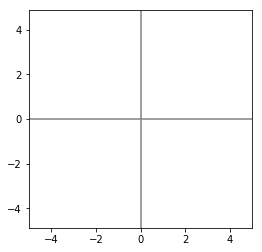

In [4]:
figure()
new_blank_plot();

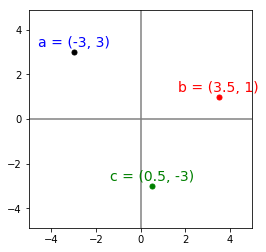

In [16]:
# Define three points
a = (-3, 3)
b = (3.5, 1)
c = (0.5, -3)

# Draw a figure containing these points
figure()
new_blank_plot()
draw_point2d(a, color='black'); draw_label2d(a, 'a', color='blue', coords=True) ## default: coords = False
draw_point2d(b, color='red'); draw_label2d(b, 'b', color='red', coords=True)
draw_point2d(c, color='green'); draw_label2d(c, 'c', color='green', coords=True)

In [8]:
# python code to represent vestors

#####################
#  def having trouble to run
#####################

def vector(*elems, dim=None):
    """
    Exercise: What does this function do?
    """
    if dim is not None:
        if len(elems) > 0:
            assert dim == len(elems), "Number of supplied elements differs from the requested dimension."
        else: # No supplied elements
            elems = [0.0] * dim
    return tuple(elems)

def dim(v):
    """Returns the dimensionality of the vector `v`"""
    return len(v)

v = vector(1.0, 2.0)
d = dim(v)
print('v = {}    <==  {}-dimensional'.format(v, d))

In [91]:
def vector(*elems):
    
    return tuple(elems)

v = vector(1.0, 2.0)
d = dim(v)
print('v = {}    <==  {}-dimensional'.format(v, d))

v = (1.0, 2.0)    <==  2-dimensional


In [84]:
def foo(first, second, third, *therest):
    print("First: %s" % first)
    print("Second: %s" % second)
    print("Third: %s" % third)
    print("And all the rest... %s" % list(therest))

foo(21,35,643,55,73,90,467)

First: 21
Second: 35
Third: 643
And all the rest... [55, 73, 90, 467]


In [93]:
# Another example: Creates a zero-vector of dimension 3

#z3 = vector(dim=3)
#print('z3 = {}    <== {}-dimensional'.format(z3, dim(z3)))

SyntaxError: invalid syntax (<ipython-input-70-1eb89d499ac7>, line 1)